## Voltage-based SOC estimation
This notebook implements two voltage-based SOC-estimation methods. The first one simply looks up cell terminal voltage under load in an OCV from SOC table. The second attempts to compensate for the effects of cell equivalent-series resistance.

In [1]:
% Add model and data files, plus ESC toolbox to path
addpath ./readonly
load('readonly/CellData.mat');
load('readonly/CellModel.mat');

### Estimating SOC based on OCV only

In [2]:
socEstimate1 = SOCfromOCVtemp(voltage,25,model);

% SOC Estimation Plot
t = 0:length(socEstimate1)-1; t = t/60;
plot(t,100*socEstimate1, t,100*soc);
title('True SOC and voltage-based estimate');
xlabel('Time (min)'); ylabel('SOC and estimate (%)');
axis([0 500 0 100]); legend('SOC estimate','True SOC'); grid on;

In [3]:
% Compute answer for quiz based on first kind of SOC estimation here...
round(100*sqrt(mean((soc - socEstimate1).^2)))

ans =  14


### Estimating SOC based on OCV, but also compensating for series resistance

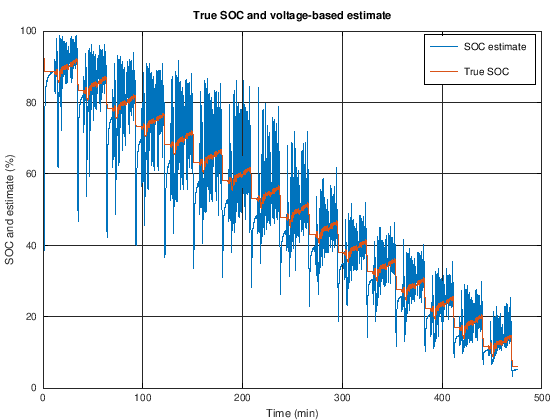

In [4]:
R0=getParamESC('R0param',25,model);

socEstimate2 = SOCfromOCVtemp(voltage+current*R0,25,model);

% SOC Estimation Plot
t = 0:length(socEstimate2)-1; t = t/60;
plot(t,100*socEstimate2, t,100*soc);
title('True SOC and voltage-based estimate');
xlabel('Time (min)'); ylabel('SOC and estimate (%)');
axis([0 500 0 100]); legend('SOC estimate','True SOC'); grid on;

In [5]:
% Compute answer for quiz based on second kind of SOC estimation here...
round(100*sqrt(mean((soc - socEstimate2).^2)))

ans =  7


In [6]:
model

model =

  scalar structure containing the fields:

    name = ECE5720
    OCV0 =

     Columns 1 through 8:

       2.9279   3.1452   3.2663   3.3395   3.3931   3.4361   3.4721   3.5031

     Columns 9 through 16:

       3.5302   3.5545   3.5764   3.5966   3.6151   3.6324   3.6485   3.6634

     Columns 17 through 24:

       3.6776   3.6911   3.7037   3.7158   3.7271   3.7379   3.7481   3.7578

     Columns 25 through 32:

       3.7666   3.7744   3.7806   3.7853   3.7888   3.7918   3.7941   3.7962

     Columns 33 through 40:

       3.7982   3.8001   3.8019   3.8038   3.8056   3.8075   3.8095   3.8117

     Columns 41 through 48:

       3.8140   3.8165   3.8192   3.8222   3.8252   3.8282   3.8315   3.8347

     Columns 49 through 56:

       3.8380   3.8411   3.8442   3.8473   3.8503   3.8532   3.8564   3.8593

     Columns 57 through 64:

       3.8622   3.8649   3.8678   3.8707   3.8735   3.8762   3.8790   3.8817

     Columns 65 through 72:

       3.8844   3.8871   3.8899   3


       0.42000   0.42500   0.43000   0.43500   0.44000   0.44500   0.45000

     Columns 92 through 98:

       0.45500   0.46000   0.46500   0.47000   0.47500   0.48000   0.48500

     Columns 99 through 105:

       0.49000   0.49500   0.50000   0.50500   0.51000   0.51500   0.52000

     Columns 106 through 112:

       0.52500   0.53000   0.53500   0.54000   0.54500   0.55000   0.55500

     Columns 113 through 119:

       0.56000   0.56500   0.57000   0.57500   0.58000   0.58500   0.59000

     Columns 120 through 126:

       0.59500   0.60000   0.60500   0.61000   0.61500   0.62000   0.62500

     Columns 127 through 133:

       0.63000   0.63500   0.64000   0.64500   0.65000   0.65500   0.66000

     Columns 134 through 140:

       0.66500   0.67000   0.67500   0.68000   0.68500   0.69000   0.69500

     Columns 141 through 147:

       0.70000   0.70500   0.71000   0.71500   0.72000   0.72500   0.73000

     Columns 148 through 154:

       0.73500   0.74000   0.74500   0.


     Columns 186 through 190:

       1.0038e+00   1.0044e+00   1.0049e+00   1.0055e+00   1.0060e+00

     Columns 191 through 195:

       1.0066e+00   1.0071e+00   1.0077e+00   1.0082e+00   1.0088e+00

     Columns 196 through 200:

       1.0093e+00   1.0099e+00   1.0104e+00   1.0110e+00   1.0116e+00

     Column 201:

       1.0121e+00

    SOCrel =

     Columns 1 through 5:

       1.3394e-05   1.3383e-05   1.3373e-05   1.3362e-05   1.3351e-05

     Columns 6 through 10:

       1.3340e-05   1.3330e-05   1.3319e-05   1.3308e-05   1.3298e-05

     Columns 11 through 15:

       1.3287e-05   1.3276e-05   1.3265e-05   1.3255e-05   1.3244e-05

     Columns 16 through 20:

       1.3233e-05   1.3222e-05   1.3212e-05   1.3201e-05   1.3190e-05

     Columns 21 through 25:

       1.3180e-05   1.3169e-05   1.3158e-05   1.3147e-05   1.3137e-05

     Columns 26 through 30:

       1.3126e-05   1.3115e-05   1.3104e-05   1.3094e-05   1.3083e-05

     Columns 31 through 35:

       1.3072e-0


       3.2771e-03   3.4602e-03   3.6749e-03   3.8983e-03   4.1935e-03

     Columns 191 through 195:

       4.5862e-03   5.1016e-03   5.8060e-03   6.8179e-03   8.3288e-03

     Columns 196 through 200:

       1.0661e-02   1.4415e-02   2.0563e-02   3.0571e-02   4.5348e-02

     Column 201:

       5.3938e-02

    dOCVrel =

     Columns 1 through 5:

       1.1291e-05   1.1929e-05   1.3285e-05   1.4699e-05   1.6023e-05

     Columns 6 through 10:

       1.7193e-05   1.8184e-05   1.8991e-05   1.9618e-05   2.0076e-05

     Columns 11 through 15:

       2.0375e-05   2.0528e-05   2.0545e-05   2.0440e-05   2.0223e-05

     Columns 16 through 20:

       1.9904e-05   1.9495e-05   1.9006e-05   1.8445e-05   1.7821e-05

     Columns 21 through 25:

       1.7144e-05   1.6420e-05   1.5658e-05   1.4864e-05   1.4045e-05

     Columns 26 through 30:

       1.3208e-05   1.2358e-05   1.1500e-05   1.0641e-05   9.7832e-06

     Columns 31 through 35:

       8.9327e-06   8.0930e-06   7.2680e-06   